In [3]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from pprint import pprint

df_taxes = pd.read_csv('Data USA - Bar Chart of Property Taxes in Austin, Tx.csv')
df_taxes.dropna()

df_taxes_renamed = df_taxes.rename(columns={'year': 'Year', 'geo_name': 'Place', 
                                            'propertytax_1500to2000': 'Property Tax 1500-2000',
                                          
                                           'propertytax_2000to3000': 'Property Tax 2000-3000',
                                         
                                           'propertytax_3000over': 'Property Tax 3000+',
                                         
                                           'propertytax_800to1500': 'Property Tax 800-1500',
                                          
                                           'propertytax_less800': 'Property Tax <800',
                                          
                                           'propertytax_none': 'No Property Tax',
                                           })
df_taxes_renamed.drop('propertytax_1500to2000_moe', axis=1, inplace=True)
df_taxes_renamed.drop('propertytax_2000to3000_moe', axis=1, inplace=True)
df_taxes_renamed.drop('propertytax_3000over_moe', axis=1, inplace=True)
df_taxes_renamed.drop('propertytax_800to1500_moe', axis=1, inplace=True)
df_taxes_renamed.drop('propertytax_less800_moe', axis=1, inplace=True)
df_taxes_renamed.drop('propertytax_none_moe', axis=1, inplace=True)
df_taxes_renamed.drop('geo', axis=1, inplace=True)
df_taxes_renamed


,Year,Place,Property Tax 1500-2000,Property Tax 2000-3000,Property Tax 3000+,Property Tax 800-1500,Property Tax <800,No Property Tax
0,2013,United States,4951470.0,7930450.0,18160300.0,8744600.0,6481110.0,1230720.0
1,2013,"Austin, TX",5002.0,10557.0,85687.0,3336.0,4340.0,1798.0
2,2014,United States,4822590.0,7841380.0,18473200.0,8555490.0,6234230.0,1248040.0
3,2014,"Austin, TX",2650.0,11581.0,88086.0,3066.0,2440.0,2819.0
4,2015,United States,4912140.0,7866950.0,19417900.0,8399580.0,5526410.0,1017720.0
5,2015,"Austin, TX",2785.0,9994.0,91696.0,2756.0,2398.0,1998.0
6,2016,United States,4879170.0,7816440.0,20151900.0,8171750.0,5239660.0,1036200.0
7,2016,"Austin, TX",3124.0,11849.0,94877.0,3570.0,1883.0,1304.0


In [2]:
#Total proportions for each tax bucket, per year, per geolocation
#               1500-2000   2000-3000      3000+    800-1500     <800         No Tax
# ------------------------------------------------------------------------------------
us_2013_total = 4951470.0 + 7930450.0 + 18160300.0 + 8744600.0 + 6481110.0 + 1230720.0
us_2014_total = 4822590.0 + 7841380.0 + 18473200.0 + 8555490.0 + 6234230.0 + 1248040.0
us_2015_total = 4912140.0 + 7866950.0 + 19417900.0 + 8399580.0 + 5526410.0 + 1017720.0
us_2016_total = 4879170.0 + 7816440.0 + 20151900.0 + 8171750.0 + 5239660.0 + 1036200.0

#US Total Percents

us_1500to2000_2013 = 4951470 / us_2013_total * 100
us_2000to3000_2013 = 7930450 / us_2013_total * 100
us_3000plus_2013 = 18160300 / us_2013_total * 100
us_800to1500_2013 = 8744600 / us_2013_total * 100
us_800less_2013 = 6481110 / us_2013_total * 100
us_notax_2013 = 1230720 / us_2013_total * 100

us_1500to2000_2014 = 4822590 / us_2014_total * 100
us_2000to3000_2014 = 7841380 / us_2014_total * 100
us_3000plus_2014 = 18473200 / us_2014_total * 100
us_800to1500_2014 = 8555490 / us_2014_total * 100
us_800less_2014 = 6234230 / us_2014_total * 100
us_notax_2014 = 1248040 / us_2014_total * 100

us_1500to2000_2015 = 4912140 / us_2015_total * 100
us_2000to3000_2015 = 7866950 / us_2015_total * 100
us_3000plus_2015 = 19417900 / us_2015_total * 100
us_800to1500_2015 = 8399580 / us_2015_total * 100
us_800less_2015 = 5526410 / us_2015_total * 100
us_notax_2015 = 1017720 / us_2015_total * 100

us_1500to2000_2016 = 4879170 / us_2016_total * 100
us_2000to3000_2016 = 7816440 / us_2016_total * 100
us_3000plus_2016 = 20151900 / us_2016_total * 100
us_800to1500_2016 = 8171750 / us_2016_total * 100
us_800less_2016 = 5239660 / us_2016_total * 100
us_notax_2016 = 1036200 / us_2016_total * 100



y_us_1500to2000 = [us_1500to2000_2013, us_1500to2000_2014, us_1500to2000_2015, us_1500to2000_2016]
y_us_2000to3000 = [us_2000to3000_2013, us_2000to3000_2014, us_2000to3000_2015, us_2000to3000_2016]
y_us_3000plus = [us_3000plus_2013, us_3000plus_2014, us_3000plus_2015, us_3000plus_2016]
y_us_800to1500 = [us_800to1500_2013, us_800to1500_2014, us_800to1500_2015, us_800to1500_2016]
y_us_800less = [us_800less_2013, us_800less_2014, us_800less_2015, us_800less_2016]
y_us_notax  = [us_notax_2013, us_notax_2014, us_notax_2015, us_notax_2016]

#Austin Percents

aus_2013_total = 5002.0 + 10557.0 + 85687.0 + 3336.0 + 4340.0 + 1798.0
aus_2014_total = 2650.0 + 11581.0 + 88086.0 + 3066.0 + 2440.0 + 2819.0
aus_2015_total = 2785.0 + 9994.0 + 91696.0 + 2756.0 + 2398.0 + 1998.0
aus_2016_total = 3124.0 + 11849.0 + 94877.0 + 3570.0 + 1883.0 + 1304.0

aus_1500to2000_2013 = 5002 / aus_2013_total * 100
aus_2000to3000_2013 = 10557 / aus_2013_total * 100
aus_3000plus_2013 = 85687 / aus_2013_total * 100
aus_800to1500_2013 = 3336 / aus_2013_total * 100
aus_800less_2013 = 4340 / aus_2013_total * 100
aus_notax_2013 = 1798 / aus_2013_total * 100

aus_1500to2000_2014 = 2650 / aus_2014_total * 100
aus_2000to3000_2014 = 11581 / aus_2014_total * 100
aus_3000plus_2014 = 88086 / aus_2014_total * 100
aus_800to1500_2014 = 3066 / aus_2014_total * 100
aus_800less_2014 = 2440 / aus_2014_total * 100
aus_notax_2014 = 2819 / aus_2014_total * 100

aus_1500to2000_2015 = 2785 / aus_2015_total * 100 
aus_2000to3000_2015 = 9994 / aus_2015_total * 100 
aus_3000plus_2015 = 91696 / aus_2015_total * 100 
aus_800to1500_2015 = 2756 / aus_2015_total * 100 
aus_800less_2015 = 2398 / aus_2015_total * 100 
aus_notax_2015 = 1998 / aus_2015_total * 100 

aus_1500to2000_2016 = 3124 / aus_2016_total * 100
aus_2000to3000_2016 = 11849 / aus_2016_total * 100
aus_3000plus_2016 = 94877 / aus_2016_total * 100
aus_800to1500_2016 = 3570 / aus_2016_total * 100
aus_800less_2016 = 1883 / aus_2016_total * 100
aus_notax_2016 = 1304 / aus_2016_total * 100



y_aus_1500to2000 = [aus_1500to2000_2013, aus_1500to2000_2014, aus_1500to2000_2015, aus_1500to2000_2016]
y_aus_2000to3000 = [aus_2000to3000_2013, aus_2000to3000_2014, aus_2000to3000_2015, aus_2000to3000_2016]
y_aus_3000plus = [aus_3000plus_2013, aus_3000plus_2014, aus_3000plus_2015, aus_3000plus_2016]
y_aus_800to1500 = [aus_800to1500_2013, aus_800to1500_2014, aus_800to1500_2015, aus_800to1500_2016]
y_aus_800less = [aus_800less_2013, aus_800less_2014, aus_800less_2015, aus_800less_2016]
y_aus_notax = [aus_notax_2013, aus_notax_2014, aus_notax_2015, aus_notax_2016]

#DO NOT EDIT THIS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

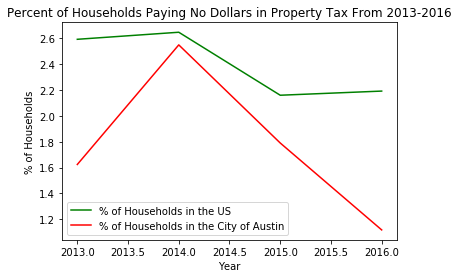

In [9]:
#Line Plot for no tax households
years = [2013, 2014, 2015, 2016]

plt.plot(years, y_us_notax, color="green", label="% of Households in the US")
plt.plot(years, y_aus_notax, color="red", label="% of Households in the City of Austin")
plt.legend(loc="best")
plt.title("Percent of Households Paying No Dollars in Property Tax From 2013-2016")
plt.xlabel('Year')
plt.ylabel('% of Households')
plt.savefig('Images/notax.png', bbox_inches='tight')

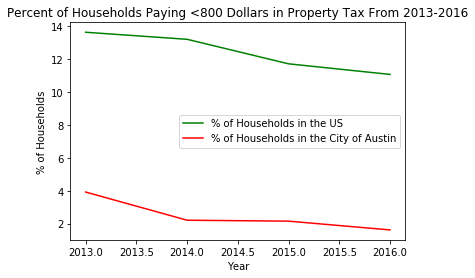

In [10]:
#Line plot for households paying 800 or less in property tax
plt.plot(years, y_us_800less, color="green", label="% of Households in the US")
plt.plot(years, y_aus_800less, color="red", label="% of Households in the City of Austin")
plt.legend(loc="best")
plt.title("Percent of Households Paying <800 Dollars in Property Tax From 2013-2016")
plt.xlabel('Year')
plt.ylabel('% of Households')
plt.savefig('Images/800less.png', bbox_inches='tight')

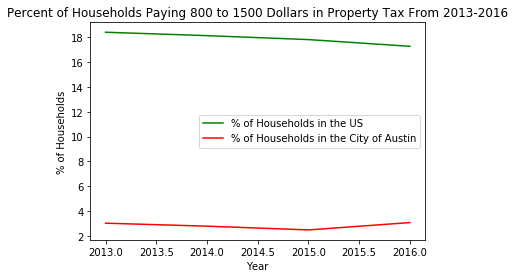

In [11]:
#Line plot for households paying 800 to 1500 in taxes

years = [2013, 2014, 2015, 2016]

plt.plot(years, y_us_800to1500, color="green", label="% of Households in the US")
plt.plot(years, y_aus_800to1500, color="red", label="% of Households in the City of Austin")
plt.legend(loc="best")
plt.title("Percent of Households Paying 800 to 1500 Dollars in Property Tax From 2013-2016")
plt.xlabel('Year')
plt.ylabel('% of Households')
plt.savefig('Images/800to1500.png', bbox_inches='tight')

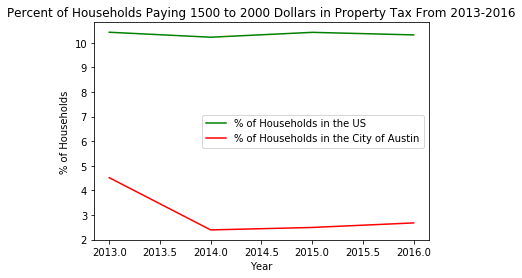

In [12]:
#Line Plot 1500 to 2000
years = [2013, 2014, 2015, 2016]

plt.plot(years, y_us_1500to2000, color="green", label="% of Households in the US")
plt.plot(years, y_aus_1500to2000, color="red", label="% of Households in the City of Austin")
plt.legend(loc="best")
plt.title("Percent of Households Paying 1500 to 2000 Dollars in Property Tax From 2013-2016")
plt.xlabel('Year')
plt.ylabel('% of Households')
plt.savefig('Images/1500to2000.png', bbox_inches='tight')

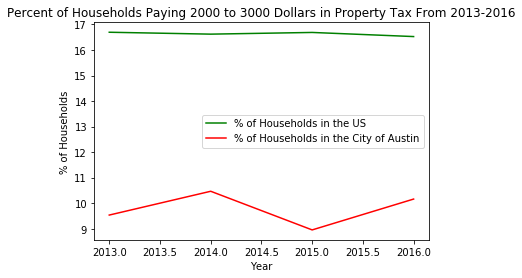

In [13]:
years = [2013, 2014, 2015, 2016]

plt.plot(years, y_us_2000to3000, color="green", label="% of Households in the US")
plt.plot(years, y_aus_2000to3000, color="red", label="% of Households in the City of Austin")
plt.legend(loc="best")
plt.title("Percent of Households Paying 2000 to 3000 Dollars in Property Tax From 2013-2016")
plt.xlabel('Year')
plt.ylabel('% of Households')
plt.savefig('Images/2000to3000.png', bbox_inches='tight')

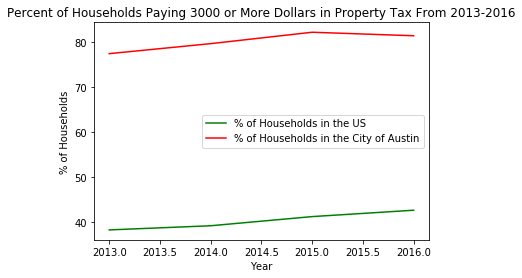

In [14]:
plt.plot(years, y_us_3000plus, color="green", label="% of Households in the US")
plt.plot(years, y_aus_3000plus, color="red", label="% of Households in the City of Austin")
plt.legend(loc="best")
plt.title("Percent of Households Paying 3000 or More Dollars in Property Tax From 2013-2016")
plt.xlabel('Year')
plt.ylabel('% of Households')
plt.savefig('Images/3000plus.png', bbox_inches='tight')